## 국세청 통계 데이터를 이용한 코로나 발생이후 100대 생활업종 변화
- [CheetSheet](https://github.com/matplotlib/cheatsheets/blob/master/cheatsheets-1.png)
- [Codetorial](https://codetorial.net/matplotlib/index.html)
- [파이썬으로 데이터시각화 하기](https://wikidocs.net/book/5011)

### 0. 데이터셋 설명(100대 생활업종 명세)
- 그래프 chart
 
- 히스토그램 Histogram
 * 
- 다중 그래프

### 1. 지역별 사업자 현황
- 원그래프 Pie chart
- 상자그림 Boxplot
- 산점도 Scatter plot
- 선그래프 Line plot
- 상관분석 Correlation
- [Seaborn Module](https://seaborn.pydata.org/)

### 2. 업종별 사업자 현황
### 3. 지역별 주요 업종 비교
### 4. 코로나 전후의 사업자수 변화
### 5. 코로나 이후 감소한 업종
### 6. 코로나 이후 증가한 업종
### 7. 결론 : 코로나 1년이 자영업자에게 준 영향은 어떠한가?



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [262]:
import sys
import io
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgunbd.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [3]:
%ls

 C 드라이브의 볼륨: SSD
 볼륨 일련 번호: BCA4-98AF

 C:\Users\inhoinno\Desktop\Ordered Softeware\2021 봄\빅데이터처리_신현석\HW_BIG 디렉터리

2021-06-03  오후 03:26    <DIR>          .
2021-06-03  오후 03:26    <DIR>          ..
2021-06-03  오전 01:58    <DIR>          .ipynb_checkpoints
2021-05-31  오후 08:41         7,362,645 1920_origin.zip
2021-06-02  오후 11:05    <DIR>          1920_preprocessed
2021-05-31  오후 08:40           378,221 1920_preprocessed.zip
2021-06-02  오후 11:15    <DIR>          1920_processed
2021-06-02  오후 08:48            74,295 2020_1_total.csv
2021-06-03  오전 01:49         1,864,515 COVID_BigTable(stack).csv
2021-06-03  오전 01:49           195,556 COVID_BigTable.csv
2021-06-02  오후 08:59         2,555,166 Data_-Idxing.ipynb
2021-05-31  오후 06:43             8,126 Data_preprocessing_Auto.ipynb
2021-06-02  오후 08:50            58,221 Data_preprocessing1.ipynb
2021-05-31  오후 06:43            92,753 Data_preprocessing1-M45.ipynb
2021-06-02  오후 08:23    <DIR>          Data_preprocessing2-Idxing
2021-06-03 

In [4]:
#data load
data = pd.read_csv('./COVID_BigTable.csv', encoding='utf-8').set_index(['year','month','city'])
data.index.names=['year','month','city']
data = data.sort_index()

In [5]:
data

B. 업종전체   가구점  가스충전소  가전제품수리점  가전제품판매점   간이주점  간판광고물업  \
year month city                                                             
2019 1     강원도        82677   300     93      465      444    439     505   
           경기도       520472  1873    372     3694     1810   2997    3113   
           경상남도      152758   564    151      790      727   1314     685   
           경상북도      125481   461    163      489      693    409     641   
           광주광역시      67965   214     41      393      339    188     443   
...                     ...   ...    ...      ...      ...    ...     ...   
2020 12    전라북도       88047   411    111      573      530    272     511   
           제주특별자치도    47390   191     34      194      250    156     197   
           충청남도      106102   299    130      705      532    544     479   
           충청북도       80408   275     74      495      412    391     383   
           합계       2548586  7650   1611    16962    10186  12219   12996   

                    감정평가사  건강보조식품가게  건어물가게  ...    편의점  피부ㆍ비뇨기과 의원  피부관리업  \
year month city                             ...                             
2019 1     강원도         29       496    667  ...   1589          58    951   
           경기도        358      2496    797  ...   9558         793   7548   
           경상남도        56       988    723  ...   2804         165   2399   
           경상북도        19       886    658  ...   1808          98   1390   
           광주광역시       32       397    167  ...   1010         126   1406   
...                   ...       ...    ...  ...    ...         ...    ...   
2020 12    전라북도        39       734    360  ...   1335          97   1405   
           제주특별자치도     16       180    110  ...   1200          44    794   
           충청남도        38      1272    635  ...   2383          99   1487   
           충청북도        32       435    108  ...   1615          81   1256   
           합계        1234     13988   7381  ...  44858        4071  42168   

                     피시방  한방병원ㆍ한의원   한식전문점  헬스클럽  호프전문점  화장품가게  휴대폰가게  
year month city                                                        
2019 1     강원도       420       357   19271   205   1485   1070    588  
           경기도      2413      3155   77957  1680   7127   7771   3901  
           경상남도      678       807   31752   386   1539   2434   1292  
           경상북도      593       635   29086   343   1068   1871   1086  
           광주광역시     426       416    9558   216   2406   1118    588  
...                  ...       ...     ...   ...    ...    ...    ...  
2020 12    전라북도      391       541   14620   244   1124   1474    722  
           제주특별자치도   168       199    9068   136    605    664    244  
           충청남도      452       517   20013   292   1391   1356    886  
           충청북도      359       406   15764   276   1533    985    551  
           합계       9970     14947  397465  8569  29002  35004  18737  

[432 rows x 101 columns]

In [7]:
df = pd.DataFrame(data.stack(), columns=['store'])

In [8]:
df

store
year month city                
2019 1     강원도  B. 업종전체   82677
                가구점         300
                가스충전소        93
                가전제품수리점     465
                가전제품판매점     444
...                         ...
2020 12    합계   한식전문점    397465
                헬스클럽       8569
                호프전문점     29002
                화장품가게     35004
                휴대폰가게     18737

[43632 rows x 1 columns]

---
## 1. 지역별 사업자 현황
* 지역 : 강원도, 경기도, ... 서울특별시, ..., 충청북도, 합계 
    - Pie Chart
    - Chart
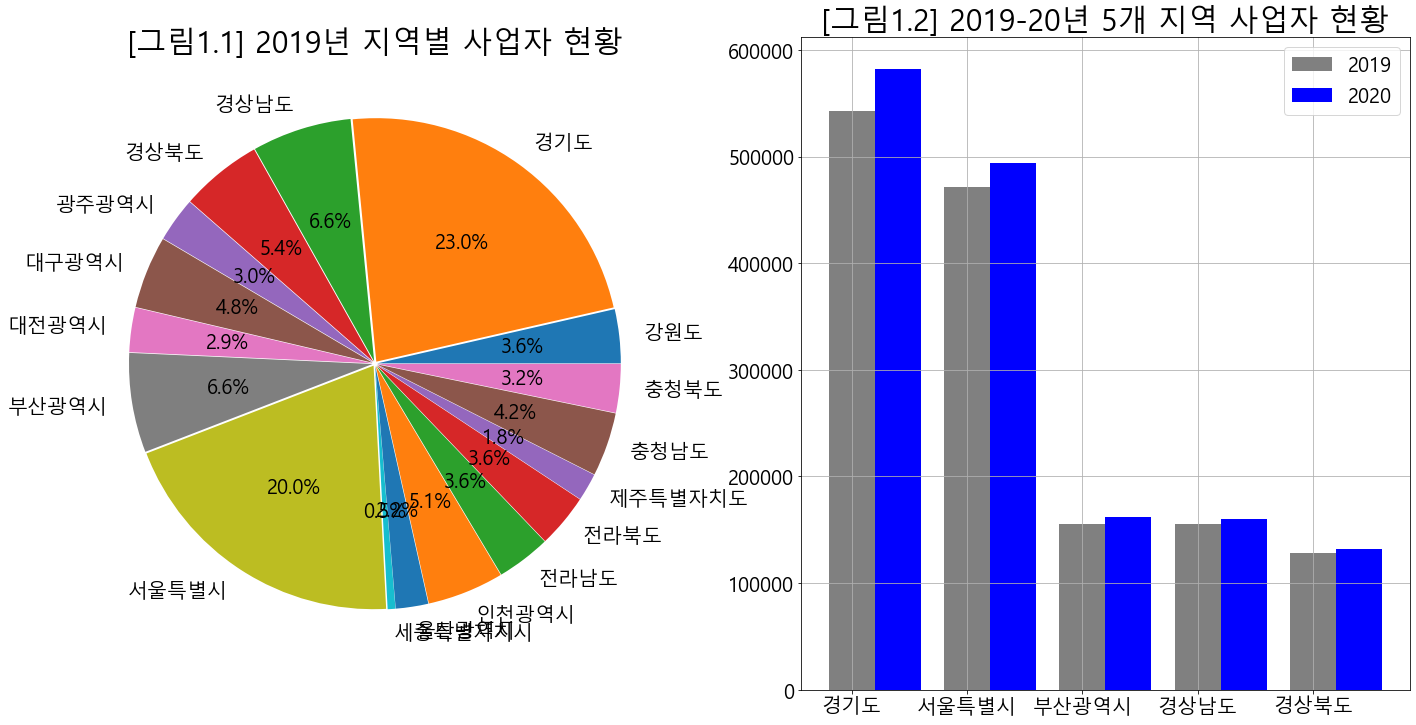

In [386]:
df_19 = data.loc[(slice(2019), slice(None),),:].unstack(level=1).loc[(slice(None), slice('B. 업종전체'))]
df_20 = data.loc[(slice(2020,2020), slice(None),),:].unstack(level=1).loc[(slice(None), slice('B. 업종전체'))]
df_19 = df_19.sort_index()
df_20 = df_20.sort_index()

In [387]:
idx = pd.IndexSlice

In [388]:
df_19 = df_19.sort_index()

In [389]:
df_19.index

MultiIndex([(2019,     '강원도'),
            (2019,     '경기도'),
            (2019,    '경상남도'),
            (2019,    '경상북도'),
            (2019,   '광주광역시'),
            (2019,   '대구광역시'),
            (2019,   '대전광역시'),
            (2019,   '부산광역시'),
            (2019,   '서울특별시'),
            (2019, '세종특별자치시'),
            (2019,   '울산광역시'),
            (2019,   '인천광역시'),
            (2019,    '전라남도'),
            (2019,    '전라북도'),
            (2019, '제주특별자치도'),
            (2019,    '충청남도'),
            (2019,    '충청북도'),
            (2019,      '합계')],
           names=['year', 'city'])

In [390]:
df_20.index

MultiIndex([(2020,     '강원도'),
            (2020,     '경기도'),
            (2020,    '경상남도'),
            (2020,    '경상북도'),
            (2020,   '광주광역시'),
            (2020,   '대구광역시'),
            (2020,   '대전광역시'),
            (2020,   '부산광역시'),
            (2020,   '서울특별시'),
            (2020, '세종특별자치시'),
            (2020,   '울산광역시'),
            (2020,   '인천광역시'),
            (2020,    '전라남도'),
            (2020,    '전라북도'),
            (2020, '제주특별자치도'),
            (2020,    '충청남도'),
            (2020,    '충청북도'),
            (2020,      '합계')],
           names=['year', 'city'])

In [391]:
df_19.index = df_19.index.droplevel()
df_19.columns = df_19.columns.droplevel()
df_20.index =df_20.index.droplevel()
df_20.columns = df_20.columns.droplevel()


In [392]:
df_19 = df_19.iloc[:-1]
df_20 = df_20.iloc[:-1]

In [393]:
#plt.rcParams.keys()

In [395]:
df_20

month        1       2       3       4       5       6       7       8   \
city                                                                      
강원도       85671   85777   85671   86288   86702   87269   87834   88082   
경기도      558878  561970  564220  568995  573325  579208  584928  589504   
경상남도     157493  157833  157677  158304  159124  160082  160861  161520   
경상북도     129486  129615  129542  130110  130822  131699  132196  132711   
광주광역시     70997   71137   71367   71610   71892   72330   72610   72783   
대구광역시    115230  115508  115633  116345  117073  117929  118589  119004   
대전광역시     70759   70893   70954   71282   71531   72008   72376   72543   
부산광역시    158114  158451  158710  159961  160868  161958  162888  163666   
서울특별시    480266  482174  481508  484468  487912  492161  496455  498716   
세종특별자치시   12889   13000   13108   13236   13340   13479   13667   13805   
울산광역시     51626   51785   51744   51957   52194   52559   52854   52965   
인천광역시    122585  123069  123300  124167  124990  125964  127035  128028   
전라남도      85418   85569   85631   86112   86527   87123   87635   87971   
전라북도      85075   85151   85296   85678   86014   86474   86864   87170   
제주특별자치도   44580   44741   44880   45076   45328   45713   46092   46337   
충청남도     101352  101725  101737  102336  102838  103432  104077  104524   
충청북도      77237   77311   77371   77770   78056   78588   79018   79270   

month        9       10      11      12  
city                                     
강원도       88513   88777   89078   89174  
경기도      595288  600608  605277  607611  
경상남도     162405  163113  163758  164113  
경상북도     133292  133861  134378  134420  
광주광역시     73292   73601   73822   73840  
대구광역시    119650  120146  120632  120587  
대전광역시     72927   73245   73569   73542  
부산광역시    164602  165454  166158  166264  
서울특별시    501875  504873  507899  508188  
세종특별자치시   13961   14113   14290   14380  
울산광역시     53212   53445   53671   53737  
인천광역시    129209  130124  131051  131544  
전라남도      88427   88843   89212   89239  
전라북도      87672   87841   88077   88047  
제주특별자치도   46606   46938   47202   47390  
충청남도     105065  105462  105936  106102  
충청북도      79819   80182   80495   80408

Text(0.5, 1.0, '2019년 지역별 사업자 현황')

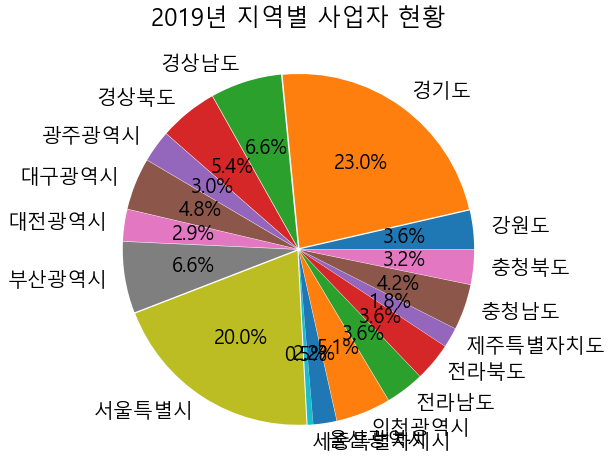

In [446]:
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 20
labels = df_19.index 
plt.pie(df_19.mean(axis =1), labels = labels, autopct='%.1f%%',  explode= [0.01]*len(labels))
plt.title("2019년 지역별 사업자 현황")

In [397]:
df = pd.DataFrame(df_19.mean(axis =1), index = df_19.index,columns=['val']).sort_values(by='val', ascending=False).head(5)
df2 = pd.DataFrame(df_20.mean(axis =1), index = df_20.index,columns=['val']).sort_values(by='val', ascending=False).head(5)

In [398]:
df['val'].values

array([542413.91666667, 471121.58333333, 155873.75      , 155717.58333333,
       127949.25      ])

In [400]:
df2

val
city                
경기도    582484.333333
서울특별시  493874.583333
부산광역시  162257.833333
경상남도   160523.583333
경상북도   131844.333333

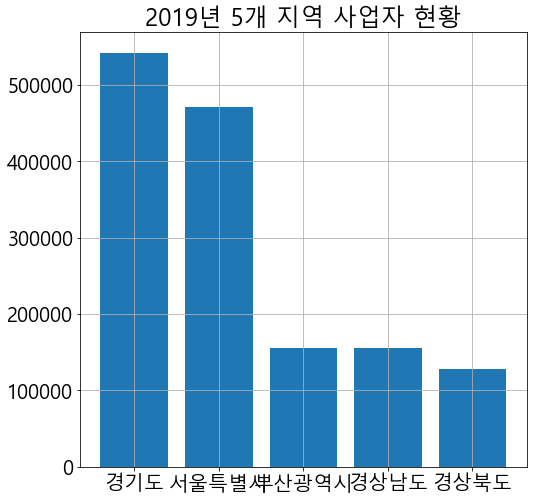

In [405]:
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 20
labels = df.index 
plt.bar(df.index,df['val'].values, width=0.8)
plt.title("2019년 5개 지역 사업자 현황")
plt.grid(True)

In [402]:
df2

val
city                
경기도    582484.333333
서울특별시  493874.583333
부산광역시  162257.833333
경상남도   160523.583333
경상북도   131844.333333

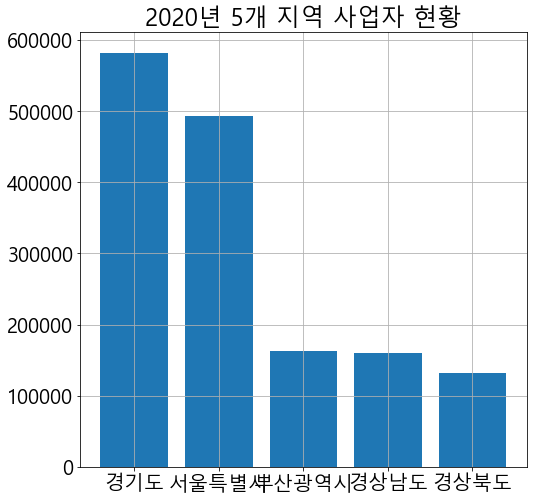

In [404]:
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 20
labels = df2.index 
plt.bar(df2.index,df2['val'].values, width=0.8)
plt.title("2020년 5개 지역 사업자 현황")
plt.grid(True)

([<matplotlib.axis.YTick at 0x1a52f333cd0>,
 [Text(0, 0, '0'), Text(0, 0, '0.2M'), Text(0, 0, '0.4M'), Text(0, 0, '0.6M')])

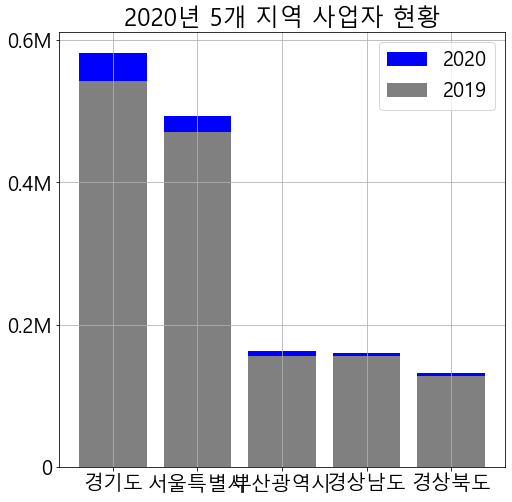

In [431]:

plt.bar(df2.index,df2['val'].values, width=0.8, color='blue', label='2020')
plt.bar(df.index,df['val'].values, width=0.8, color='gray', label='2019')
plt.title("2020년 5개 지역 사업자 현황")
plt.legend(loc='best')
plt.grid(True)
plt.yticks(np.arange(0, 800000, step=200000), ('0', '0.2M', '0.4M', '0.6M', '0.8M', '1M'))

([<matplotlib.axis.YTick at 0x1a53088ce50>,
 [Text(0, 0, '0'), Text(0, 0, '0.2M'), Text(0, 0, '0.4M'), Text(0, 0, '0.6M')])

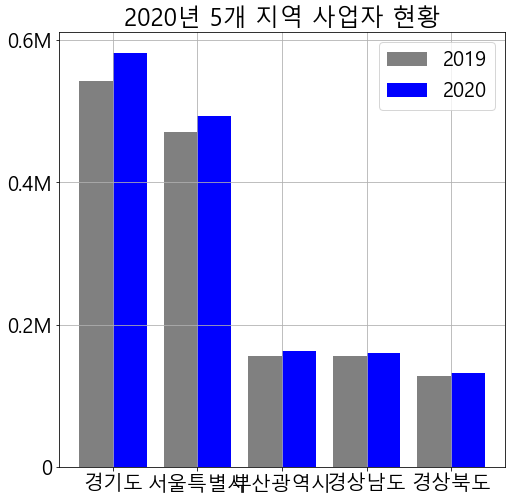

In [442]:
x=np.arange(len(df.index))
w=0.4
plt.bar(df.index,df['val'].values, width=0.4, color='gray', label='2019')
plt.bar(x+w,df2['val'].values, width=0.4, color='blue', label='2020')
plt.title("2020년 5개 지역 사업자 현황")
plt.legend(loc='best')
plt.grid(True)
plt.xticks(x+w/2,df.index)
plt.yticks(np.arange(0, 800000, step=200000), ('0', '0.2M', '0.4M', '0.6M', '0.8M', '1M'))

In [441]:
fig

([<matplotlib.axis.YTick at 0x1a530827760>,
 [Text(0, 0, '0'),
  Text(0, 200000, '0.2M'),
  Text(0, 400000, '0.4M'),
  Text(0, 600000, '0.6M')])

In [433]:
plt.show()

In [418]:
np.arange(0, 7)

array([0, 1, 2, 3, 4, 5, 6])

In [338]:
?plt.bar

In [ ]:
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 20
labels = df_19.index 
plt.hist(df_19.mean(axis =1), labels = labels, autopct='%.1f%%',  explode= [0.01]*len(labels))
plt.title("2019년 5개 지역 사업자 현황")

Text(0.5, 1.0, '[그림1.2] 2019-20년 5개 지역 사업자 변화')

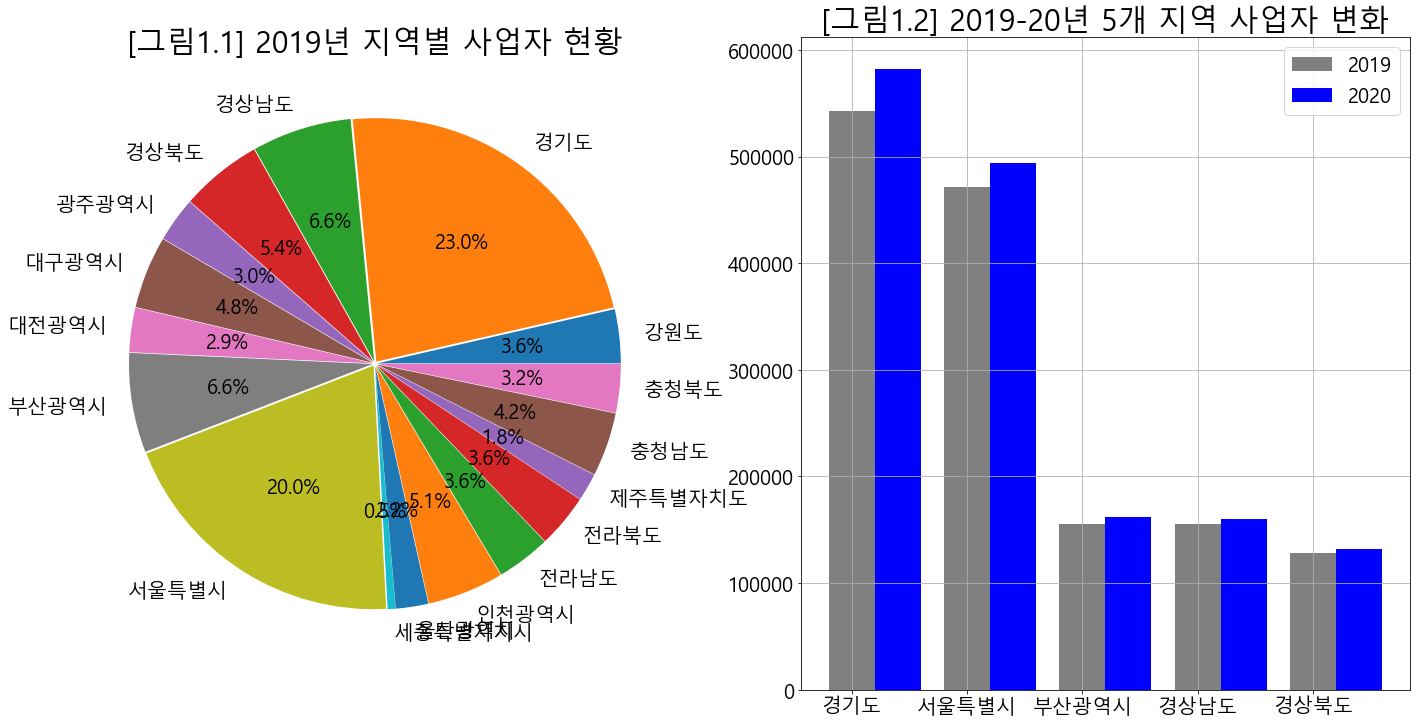

In [481]:
x=np.arange(len(df.index))
w=0.4
fig , axes = plt.subplots(1,2, figsize=(24,12))
axes[0].pie(df_20.mean(axis =1), labels = df_20.index , autopct='%.1f%%',  explode= [0.01]*len(labels))
axes[0].set_title("[그림1.1] 2020년 지역별 사업자 현황", fontsize=30)
axes[1].bar(df.index,df['val'].values, width=0.4, color='gray', label='2019')
axes[1].bar(x+w,df2['val'].values, width=0.4, color='blue', label='2020')
axes[1].legend(loc='best')
#axes[1].set_yticks(np.arange(0, 800000, step=200000), ('0', '0.2M', '0.4M', '0.6M', '0.8M', '1M'))
axes[1].grid(True)
axes[1].set_title("[그림1.2] 2019-20년 5개 지역 사업자 변화", fontsize=30)

## 2. 업종별 사업자 현황
* 업종 : 가구점, ... 미용사, 변리사, ...,합계 
    - Pie Chart
    - Chart

In [485]:
len(df_19.mean(axis =1))

17

In [ ]:
#idx = pd.IndexSlice # 인덱스 객체 생성
#test.loc[idx[:,'강원도'],idx['LPG 충전소':]]

In [502]:
idx=pd.IndexSlice
data.stack().loc[idx[:2019,1,'합계'],:]
#df_19 = data.loc[(slice(2019), slice(None),),:].unstack(level=1).loc[(slice(None), slice('B. 업종전체'))]
#df_20 = data.loc[(slice(2020,2020), slice(None),),:].unstack(level=1).loc[(slice(None), slice('B. 업종전체'))]

year  month  city         
2019  1      강원도   B. 업종전체     82677
                   가구점           300
                   가스충전소          93
                   가전제품수리점       465
                   가전제품판매점       444
                               ...  
      12     합계    한식전문점      386161
                   헬스클럽         7718
                   호프전문점       32992
                   화장품가게       34922
                   휴대폰가게       18109
Length: 21816, dtype: int64

In [527]:
data.columns[1:]

Index(['가구점', '가스충전소', '가전제품수리점', '가전제품판매점', '간이주점', '간판광고물업', '감정평가사',
       '건강보조식품가게', '건어물가게', '건축사', '결혼상담소', '곡물가게', '공부방', '공인노무사', '공인회계사',
       '과일가게', '교습학원', '구내식당', '기술및직업훈련학원', '기술사', '기타 일반의원', '기타외국식전문점',
       '기타음식점', '꽃가게', '내과ㆍ소아과 의원', '노래방', '담배가게', '당구장', '독서실', '동물병원', '목욕탕',
       '문구점', '미용실', '법무사', '변리사', '변호사', '부동산중개업', '분식점', '사진촬영업', '산부인과 의원',
       '생선가게', '서점', '성형외과 의원', '세무사', '세탁소', '슈퍼마켓', '스포츠교육기관', '스포츠시설운영업',
       '스포츠용품점', '시계ㆍ귀금속점', '식료품가게', '신경정신과 의원', '신발가게', '실내스크린골프점', '실내장식가게',
       '실외골프연습장', '안경점', '안과 의원', '애완용품점', '약국', '여관ㆍ모텔', '여행사', '예술학원', '예식장',
       '옷가게', '의료용품가게', '이륜자동차판매점', '이발소', '이비인후과 의원', '일반외과 의원', '일식전문점',
       '자동차수리점', '자전거판매점', '장난감가게', '정육점', '제과점', '종합병원', '주유소', '주차장운영업',
       '중고차판매점', '중식전문점', '채소가게', '철물점', '치과병원ㆍ의원', '침구ㆍ커튼가게', '커피음료점',
       '컴퓨터판매점', '통신판매업', '패스트푸드점', '펜션ㆍ게스트하우스', '편의점', '피부ㆍ비뇨기과 의원', '피부관리업',
       '피시방', '한방병원ㆍ한의원', '한식전문점', '헬스클럽', '호프전문점', '화장품가게', '휴대폰가게'],
      dtyp

In [587]:
df_19 = data.loc[idx[2019,idx[:],'합계'],:][data.columns[1:]]
df_20 = data.loc[idx[2020,idx[:],'합계'],:][data.columns[1:]]

In [588]:
ax = 0
bx= 0

In [589]:
df_19 = pd.DataFrame(df_19.stack())
df_19.columns[0]

0

In [591]:
df_19.rename(columns = {0:"val"},inplace=True)

In [593]:
df_19.index

MultiIndex([(2019,  1, '합계',        '가구점'),
            (2019,  1, '합계',      '가스충전소'),
            (2019,  1, '합계',    '가전제품수리점'),
            (2019,  1, '합계',    '가전제품판매점'),
            (2019,  1, '합계',       '간이주점'),
            (2019,  1, '합계',     '간판광고물업'),
            (2019,  1, '합계',      '감정평가사'),
            (2019,  1, '합계',   '건강보조식품가게'),
            (2019,  1, '합계',      '건어물가게'),
            (2019,  1, '합계',        '건축사'),
            ...
            (2019, 12, '합계',        '편의점'),
            (2019, 12, '합계', '피부ㆍ비뇨기과 의원'),
            (2019, 12, '합계',      '피부관리업'),
            (2019, 12, '합계',        '피시방'),
            (2019, 12, '합계',   '한방병원ㆍ한의원'),
            (2019, 12, '합계',      '한식전문점'),
            (2019, 12, '합계',       '헬스클럽'),
            (2019, 12, '합계',      '호프전문점'),
            (2019, 12, '합계',      '화장품가게'),
            (2019, 12, '합계',      '휴대폰가게')],
           names=['year', 'month', 'city', None], length=1200)

In [598]:
df_19.loc[idx[2019,12,'합계']]

val
가구점        7486
가스충전소      1604
가전제품수리점   15534
가전제품판매점   10019
간이주점      14413
...         ...
한식전문점    386161
헬스클럽       7718
호프전문점     32992
화장품가게     34922
휴대폰가게     18109

[100 rows x 1 columns]

In [559]:
ax = bx
bx +=10
df_19[idx[2019,12,]:][df_19.columns[1:]].sort_values(by=)

TypeError: sort_values() missing 1 required positional argument: 'by'

In [ ]:
df_19[idx[2019, ]]

In [486]:
colors = ['silver', 'gold', 'whitesmoke', 'lightgray']*17

In [483]:
colors

['silver',
 'gold',
 'whitesmoke',
 'lightgray',
 'silver',
 'gold',
 'whitesmoke',
 'lightgray',
 'silver',
 'gold',
 'whitesmoke',
 'lightgray',
 'silver',
 'gold',
 'whitesmoke',
 'lightgray',
 'silver',
 'gold',
 'whitesmoke',
 'lightgray',
 'silver',
 'gold',
 'whitesmoke',
 'lightgray',
 'silver',
 'gold',
 'whitesmoke',
 'lightgray',
 'silver',
 'gold',
 'whitesmoke',
 'lightgray',
 'silver',
 'gold',
 'whitesmoke',
 'lightgray',
 'silver',
 'gold',
 'whitesmoke',
 'lightgray',
 'silver',
 'gold',
 'whitesmoke',
 'lightgray',
 'silver',
 'gold',
 'whitesmoke',
 'lightgray',
 'silver',
 'gold',
 'whitesmoke',
 'lightgray',
 'silver',
 'gold',
 'whitesmoke',
 'lightgray',
 'silver',
 'gold',
 'whitesmoke',
 'lightgray',
 'silver',
 'gold',
 'whitesmoke',
 'lightgray',
 'silver',
 'gold',
 'whitesmoke',
 'lightgray',
 'silver',
 'gold',
 'whitesmoke',
 'lightgray',
 'silver',
 'gold',
 'whitesmoke',
 'lightgray']

In [ ]:
#PIE

In [ ]:
#Bar

-------------------------------------------------
-----------------------------------------------
-----------------------------------------------
-------------------------------------------------
-----------------------------------------------
-----------------------------------------------
-----------------------------------------------

-------------------------------------------------
-----------------------------------------------
-----------------------------------------------
------------------------------------------------------------------------------------------------
-----------------------------------------------
-----------------------------------------------
-----------------------------------------------

In [183]:
df_19

month              1        2        3        4        5        6        7   \
year city                                                                     
2019 강원도        82677    85777    83108    83363    83778    84145    84568   
     경기도       520472   561970   526958   530893   534510   538423   541457   
     경상남도      152758   157833   153364   154097   154667   155386   155906   
     경상북도      125481   129615   126027   126587   127050   127628   127988   
     광주광역시      67965    71137    68565    68951    69263    69512    69721   
     대구광역시     110847   115508   111711   112294   112636   113030   113353   
     대전광역시      68001    70893    68374    68695    68910    69213    69462   
     부산광역시     152670   158451   153500   154187   154902   155470   155908   
     서울특별시     458980   482174   462391   464744   466911   468708   470669   
     세종특별자치시    11313    13000    11629    11768    11896    12030    12120   
     울산광역시      50134    51785    50338    50524    50659    50861    51004   
     인천광역시     115817   123069   116997   117732   118354   119193   119897   
     전라남도       82774    85569    83117    83436    83760    84264    84551   
     전라북도       82317    85151    82771    83088    83357    83766    83996   
     제주특별자치도    41459    44741    41892    42201    42570    43109    43413   
     충청남도       97599   101725    98283    98811    99177    99714   100013   
     충청북도       74301    77311    74902    75196    75554    76004    76248   
     합계       2295565  2415709  2313927  2326567  2337954  2350456  2360274   

month              8        9        10       11       12  
year city                                                  
2019 강원도        84796    84913    85274    85495    85423  
     경기도       544912   547325   551603   555114   555330  
     경상남도      156278   156563   157090   157602   157067  
     경상북도      128413   128602   129179   129587   129234  
     광주광역시      69946    70184    70526    70886    70813  
     대구광역시     113816   114022   114676   115229   114962  
     대전광역시      69757    69892    70226    70566    70411  
     부산광역시     156303   156472   157267   157859   157496  
     서울특별시     472512   473615   476341   478626   477788  
     세종특별자치시    12209    12312    12461    12645    12722  
     울산광역시      51093    51203    51419    51612    51500  
     인천광역시     120307   120745   121552   122152   121917  
     전라남도       84844    84990    85297    85580    85346  
     전라북도       84230    84358    84743    85059    84827  
     제주특별자치도    43669    43761    43971    44270    44300  
     충청남도      100271   100488   100995   101287   101074  
     충청북도       76576    76725    77078    77353    77071  
     합계       2369932  2376170  2389698  2400922  2397281

In [58]:
df_20

B. 업종전체                                                        \
month              1        2        3        4        5        6        7    
year city                                                                     
2020 강원도        85671    85777    85671    86288    86702    87269    87834   
     경기도       558878   561970   564220   568995   573325   579208   584928   
     경상남도      157493   157833   157677   158304   159124   160082   160861   
     경상북도      129486   129615   129542   130110   130822   131699   132196   
     광주광역시      70997    71137    71367    71610    71892    72330    72610   
     대구광역시     115230   115508   115633   116345   117073   117929   118589   
     대전광역시      70759    70893    70954    71282    71531    72008    72376   
     부산광역시     158114   158451   158710   159961   160868   161958   162888   
     서울특별시     480266   482174   481508   484468   487912   492161   496455   
     세종특별자치시    12889    13000    13108    13236    13340    13479    13667   
     울산광역시      51626    51785    51744    51957    52194    52559    52854   
     인천광역시     122585   123069   123300   124167   124990   125964   127035   
     전라남도       85418    85569    85631    86112    86527    87123    87635   
     전라북도       85075    85151    85296    85678    86014    86474    86864   
     제주특별자치도    44580    44741    44880    45076    45328    45713    46092   
     충청남도      101352   101725   101737   102336   102838   103432   104077   
     충청북도       77237    77311    77371    77770    78056    78588    79018   
     합계       2407656  2415709  2418349  2433695  2448536  2467976  2485979   

                                                           
month              8        9        10       11       12  
year city                                                  
2020 강원도        88082    88513    88777    89078    89174  
     경기도       589504   595288   600608   605277   607611  
     경상남도      161520   162405   163113   163758   164113  
     경상북도      132711   133292   133861   134378   134420  
     광주광역시      72783    73292    73601    73822    73840  
     대구광역시     119004   119650   120146   120632   120587  
     대전광역시      72543    72927    73245    73569    73542  
     부산광역시     163666   164602   165454   166158   166264  
     서울특별시     498716   501875   504873   507899   508188  
     세종특별자치시    13805    13961    14113    14290    14380  
     울산광역시      52965    53212    53445    53671    53737  
     인천광역시     128028   129209   130124   131051   131544  
     전라남도       87971    88427    88843    89212    89239  
     전라북도       87170    87672    87841    88077    88047  
     제주특별자치도    46337    46606    46938    47202    47390  
     충청남도      104524   105065   105462   105936   106102  
     충청북도       79270    79819    80182    80495    80408  
     합계       2498599  2515815  2530626  2544505  2548586

In [38]:
data.loc[(slice(None),slice(None),),:]

B. 업종전체   가구점  가스충전소  가전제품수리점  가전제품판매점   간이주점  간판광고물업  \
year month city                                                             
2019 1     강원도        82677   300     93      465      444    439     505   
           경기도       520472  1873    372     3694     1810   2997    3113   
           경상남도      152758   564    151      790      727   1314     685   
           경상북도      125481   461    163      489      693    409     641   
           광주광역시      67965   214     41      393      339    188     443   
...                     ...   ...    ...      ...      ...    ...     ...   
2020 12    전라북도       88047   411    111      573      530    272     511   
           제주특별자치도    47390   191     34      194      250    156     197   
           충청남도      106102   299    130      705      532    544     479   
           충청북도       80408   275     74      495      412    391     383   
           합계       2548586  7650   1611    16962    10186  12219   12996   

                    감정평가사  건강보조식품가게  건어물가게  ...    편의점  피부ㆍ비뇨기과 의원  피부관리업  \
year month city                             ...                             
2019 1     강원도         29       496    667  ...   1589          58    951   
           경기도        358      2496    797  ...   9558         793   7548   
           경상남도        56       988    723  ...   2804         165   2399   
           경상북도        19       886    658  ...   1808          98   1390   
           광주광역시       32       397    167  ...   1010         126   1406   
...                   ...       ...    ...  ...    ...         ...    ...   
2020 12    전라북도        39       734    360  ...   1335          97   1405   
           제주특별자치도     16       180    110  ...   1200          44    794   
           충청남도        38      1272    635  ...   2383          99   1487   
           충청북도        32       435    108  ...   1615          81   1256   
           합계        1234     13988   7381  ...  44858        4071  42168   

                     피시방  한방병원ㆍ한의원   한식전문점  헬스클럽  호프전문점  화장품가게  휴대폰가게  
year month city                                                        
2019 1     강원도       420       357   19271   205   1485   1070    588  
           경기도      2413      3155   77957  1680   7127   7771   3901  
           경상남도      678       807   31752   386   1539   2434   1292  
           경상북도      593       635   29086   343   1068   1871   1086  
           광주광역시     426       416    9558   216   2406   1118    588  
...                  ...       ...     ...   ...    ...    ...    ...  
2020 12    전라북도      391       541   14620   244   1124   1474    722  
           제주특별자치도   168       199    9068   136    605    664    244  
           충청남도      452       517   20013   292   1391   1356    886  
           충청북도      359       406   15764   276   1533    985    551  
           합계       9970     14947  397465  8569  29002  35004  18737  

[432 rows x 101 columns]

In [13]:
data.index

MultiIndex([(2019,  1,     '강원도'),
            (2019,  1,     '경기도'),
            (2019,  1,    '경상남도'),
            (2019,  1,    '경상북도'),
            (2019,  1,   '광주광역시'),
            (2019,  1,   '대구광역시'),
            (2019,  1,   '대전광역시'),
            (2019,  1,   '부산광역시'),
            (2019,  1,   '서울특별시'),
            (2019,  1, '세종특별자치시'),
            ...
            (2020, 12,   '서울특별시'),
            (2020, 12, '세종특별자치시'),
            (2020, 12,   '울산광역시'),
            (2020, 12,   '인천광역시'),
            (2020, 12,    '전라남도'),
            (2020, 12,    '전라북도'),
            (2020, 12, '제주특별자치도'),
            (2020, 12,    '충청남도'),
            (2020, 12,    '충청북도'),
            (2020, 12,      '합계')],
           names=['year', 'month', 'city'], length=432)

In [47]:
data['B. 업종전체'].xs(2019).xs(1).sort()

AttributeError: 'Series' object has no attribute 'sort'

In [50]:
sns.pairplot(data['B. 업종전체'])

TypeError: 'data' must be pandas DataFrame object, not: <class 'pandas.core.series.Series'>

In [56]:
df = pd.DataFrame(data['B. 업종전체'].xs(2019).xs(1))
df

B. 업종전체
city            
강원도        82677
경기도       520472
경상남도      152758
경상북도      125481
광주광역시      67965
대구광역시     110847
대전광역시      68001
부산광역시     152670
서울특별시     458980
세종특별자치시    11313
울산광역시      50134
인천광역시     115817
전라남도       82774
전라북도       82317
제주특별자치도    41459
충청남도       97599
충청북도       74301
합계       2295565

C:\Users\inhoinno\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\inhoinno\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\inhoinno\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\inhoinno\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)


C:\Users\inhoinno\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 50629 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\inhoinno\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\inhoinno\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\inhoinno\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0, flags=flags)


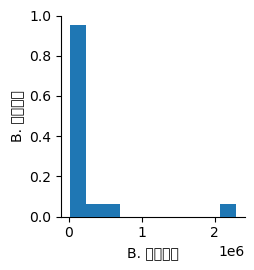

In [57]:
sns.pairplot(df)

C:\Users\inhoinno\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\inhoinno\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\inhoinno\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\inhoinno\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\inhoinno\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\inhoinno\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49

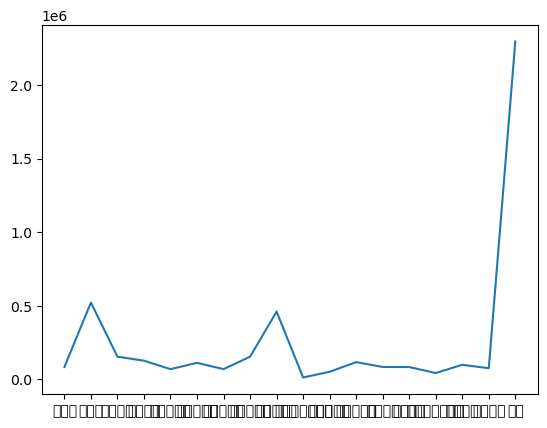

In [45]:
plt.plot(data['B. 업종전체'].xs(2019).xs(1).index, data['B. 업종전체'].xs(2019).xs(1).values) 

In [30]:
plt.show()

<BarContainer object of 4 artists>

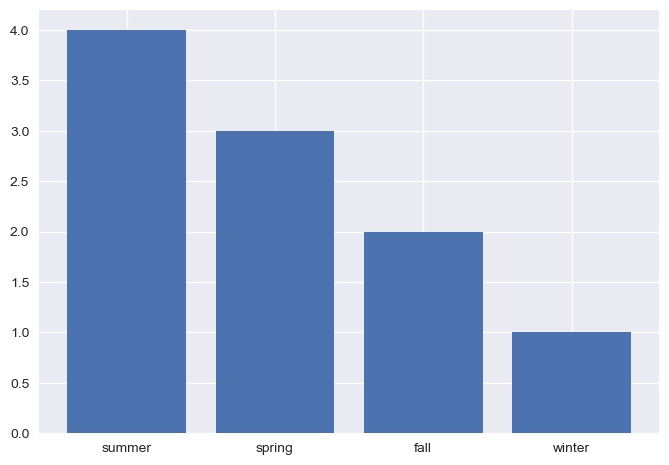

In [5]:
plt.style.use('seaborn') #'seaborn'
plt.bar(ds.index,ds.values)

([<matplotlib.patches.Wedge at 0x13effdafc70>,
 [Text(0.33991867422268784, 1.0461621742897658, ''),
  Text(-1.0461621424642782, -0.3399187721714579, ''),
  Text(0.3399188211458418, -1.0461621265515308, ''),
  Text(1.0461622140716127, -0.3399185517867209, '')])

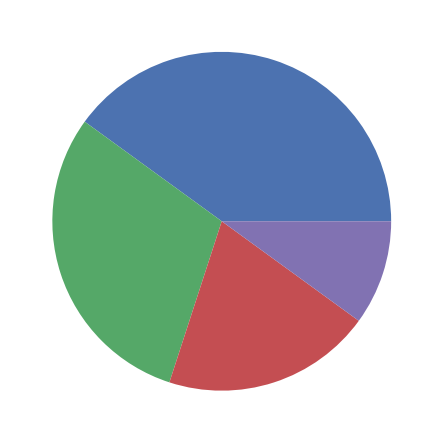

In [6]:
plt.pie(ds.values)

In [7]:
ds.index

Index(['summer', 'spring', 'fall', 'winter'], dtype='object')

([<matplotlib.patches.Wedge at 0x13e88fe1100>,
 [Text(0.33991867422268784, 1.0461621742897658, 'summer'),
  Text(-1.0461621424642782, -0.3399187721714579, 'spring'),
  Text(0.3399188211458418, -1.0461621265515308, 'fall'),
  Text(1.0461622140716127, -0.3399185517867209, 'winter')])

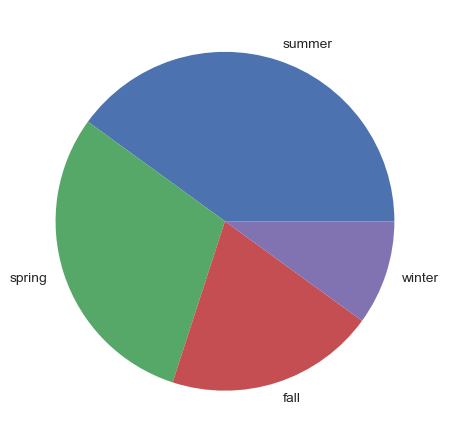

In [8]:
plt.pie(ds.values, labels = ds.index)

([<matplotlib.patches.Wedge at 0x13e8901f880>,
 [Text(0.33991867422268784, 1.0461621742897658, 'summer'),
  Text(-1.0461621424642782, -0.3399187721714579, 'spring'),
  Text(0.3399188211458418, -1.0461621265515308, 'fall'),
  Text(1.0461622140716127, -0.3399185517867209, 'winter')],
 [Text(0.1854101859396479, 0.5706339132489631, '40.0%'),
  Text(-0.5706338958896062, -0.18541023936624976, '30.0%'),
  Text(0.18541026607955005, -0.5706338872099259, '20.0%'),
  Text(0.5706339349481523, -0.18541011915639322, '10.0%')])

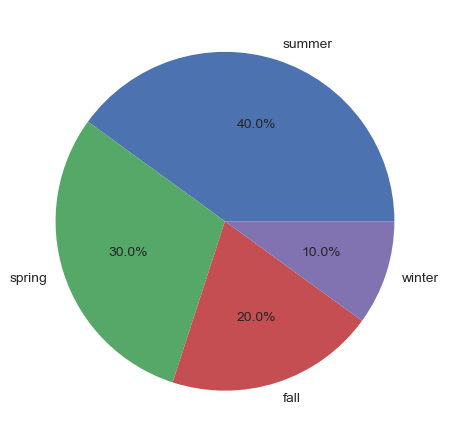

In [9]:
plt.pie(ds.values, 
        labels=ds.index, 
        autopct='%.1f%%')

([<matplotlib.patches.Wedge at 0x13e892bf9d0>,
 [Text(0.34300884398834863, 1.0556727395105818, 'summer'),
  Text(-1.0556727073957717, -0.34300894282756206, 'spring'),
  Text(0.34300899224716763, -1.055672691338363, 'fall'),
  Text(1.3314791815456888, -0.43262361136491756, 'winter')],
 [Text(0.18850035570530868, 0.5801444784697791, '40%'),
  Text(-0.5801444608210997, -0.18850041002235393, '30%'),
  Text(0.1885004371808759, -0.580144451996758, '20%'),
  Text(0.8559509024222285, -0.2781151787345898, '10%')])

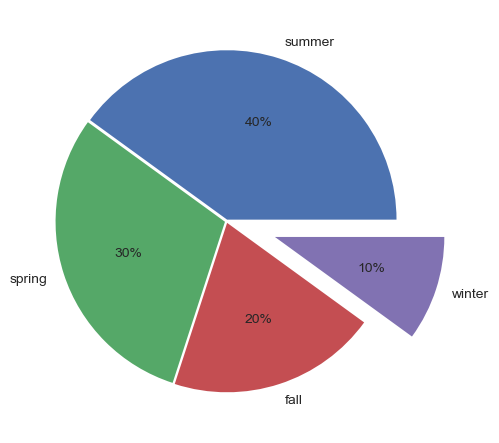

In [19]:
plt.pie(ds.values, 
        labels=ds.index, 
        autopct='%.0f%%', 
        explode= [0.01, 0.01, 0.01, 0.3])#explode : 분할

([<matplotlib.patches.Wedge at 0x13e893edb50>,
 [Text(0.34300884398834863, 1.0556727395105818, 'summer'),
  Text(-1.1412677917792124, -0.3708204787324995, 'spring'),
  Text(0.34300899224716763, -1.055672691338363, 'fall'),
  Text(1.055672779654082, -0.34300872043932745, 'winter')],
 [Text(0.18850035570530868, 0.5801444784697791, '40%'),
  Text(-0.6657395452045406, -0.2163119459272914, '30%'),
  Text(0.1885004371808759, -0.580144451996758, '20%'),
  Text(0.5801445005306215, -0.18850028780899977, '10%')])

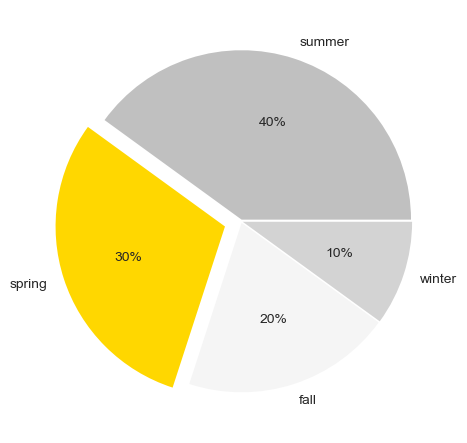

In [23]:
explode = [0.01, 0.1, 0.01, 0.01]
colors = ['silver', 'gold', 'whitesmoke', 'lightgray']
# gold highlight
plt.pie(ds.values, 
        labels=ds.index, 
        autopct='%.0f%%', 
        explode=explode, 
        colors=colors)

([<matplotlib.patches.Wedge at 0x13e8963c760>,
 [Text(0.35536952305099184, 1.093715000393846, 'summer'),
  Text(-1.0937149671217454, -0.3553696254519787, 'spring'),
  Text(0.355369676652471, -1.0937149504856913, 'fall'),
  Text(1.0937150419839587, -0.3553693950497537, 'winter')],
 [Text(0.2008610347679519, 0.6181867393530434, '40%'),
  Text(-0.6181867205470735, -0.20086109264677057, '30%'),
  Text(0.20086112158617922, -0.6181867111440864, '20%'),
  Text(0.6181867628604983, -0.20086096241942597, '10%')])

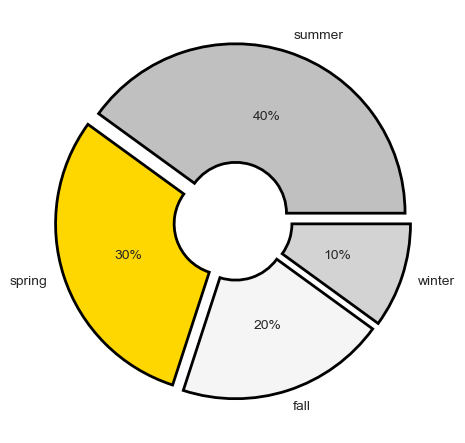

In [25]:
explode = [0.05, 0.05, 0.05, 0.05]
colors = ['silver', 'gold', 'whitesmoke', 'lightgray']
wedgeprops={'width': 0.7, 'edgecolor': 'black', 'linewidth': 2}

plt.pie(ds.values, 
        labels=ds.index, 
        autopct='%.0f%%', 
        explode=explode, 
        colors=colors, 
        wedgeprops=wedgeprops)

---
### 2. 상자그림
- 상자 수염 그림 box and wisker plot이라 부르기도 하며, 사분위수를 시각화하며 그래프 형태로 나타낸 것
- 하나의 그래프로 데이터의 분포 형태를 포함한 다양한 정보를 전달하기 때문에 단일변수 수치형 자료를 파악하는데 자주 사용  
![boxplot](https://pro.arcgis.com/en/pro-app/help/analysis/geoprocessing/charts/GUID-0E2C3730-C535-40CD-8152-80D794A996A7-web.png)  
![boxplot2](https://jingwen-z.github.io/images/20190319-boxplot-vs-pdf.png)  
![boxplot3](http://www.scielo.org.mx/img/revistas/eq/v27n3//0187-893X-eq-27-03-00209-gf2.jpg)  
![boxplot4](https://blog.bioturing.com/wp-content/uploads/2018/05/biovinci-box-plot.png)

In [26]:
# https://gist.github.com/ZeccaLehn/4e06d2575eb9589dbe8c365d61cb056c#file-mtcars-csv
data = pd.read_csv('https://gist.githubusercontent.com/ZeccaLehn/4e06d2575eb9589dbe8c365d61cb056c/raw/64f1660f38ef523b2a1a13be77b002b98665cdfe/mtcars.csv')
data.rename(columns={'Unnamed: 0':'brand'}, inplace=True)
data.head

<bound method NDFrame.head of                   brand   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  \
0             Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1   
1         Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1   
2            Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1   
3        Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0   
4     Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0   
5               Valiant  18.1    6  225.0  105  2.76  3.460  20.22   1   0   
6            Duster 360  14.3    8  360.0  245  3.21  3.570  15.84   0   0   
7             Merc 240D  24.4    4  146.7   62  3.69  3.190  20.00   1   0   
8              Merc 230  22.8    4  140.8   95  3.92  3.150  22.90   1   0   
9              Merc 280  19.2    6  167.6  123  3.92  3.440  18.30   1   0   
10            Merc 280C  17.8    6  167.6  123  3.92  3.440  18.90   1   0   
11           Merc 450SE  16.4    8

([<matplotlib.axis.XTick at 0x13e8a734850>], [Text(0, 0, 'mpg')])

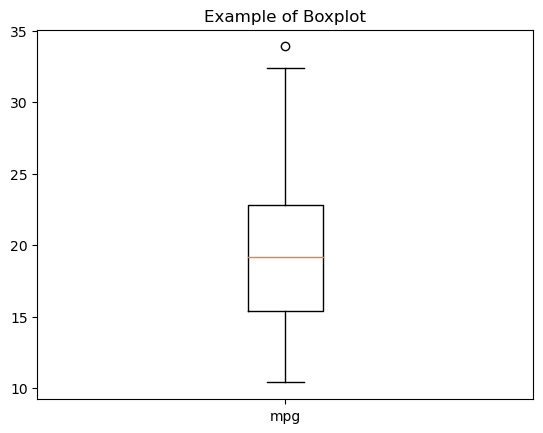

In [34]:
plt.boxplot(data['mpg'])
plt.title('Example of Boxplot')
plt.xticks([1],['mpg'])

In [33]:
plt.style.use("default")

#### 다중 상자그림

Text(0, 0.5, 'Value')

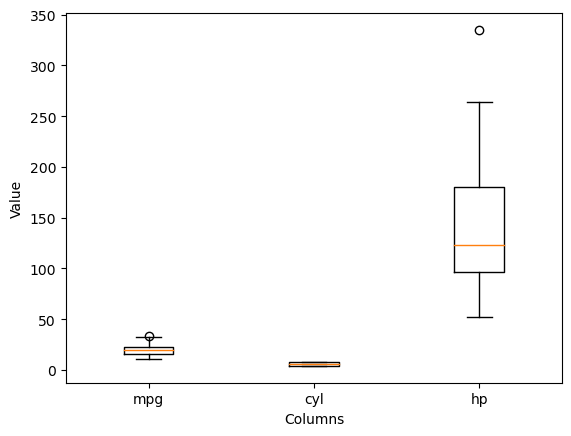

In [35]:
fig, ax = plt.subplots()
#fig = 도화지
#ax  = 도화지 내 그림
ax.boxplot([data['mpg'], data['cyl'], data['hp']])
ax.set_xticklabels(['mpg','cyl','hp'])
ax.set_xlabel('Columns')
ax.set_ylabel('Value')

#### 그룹 정보가 있는 상자그림

In [37]:
data

brand   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  \
0             Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1   
1         Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1   
2            Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1   
3        Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0   
4     Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0   
5               Valiant  18.1    6  225.0  105  2.76  3.460  20.22   1   0   
6            Duster 360  14.3    8  360.0  245  3.21  3.570  15.84   0   0   
7             Merc 240D  24.4    4  146.7   62  3.69  3.190  20.00   1   0   
8              Merc 230  22.8    4  140.8   95  3.92  3.150  22.90   1   0   
9              Merc 280  19.2    6  167.6  123  3.92  3.440  18.30   1   0   
10            Merc 280C  17.8    6  167.6  123  3.92  3.440  18.90   1   0   
11           Merc 450SE  16.4    8  275.8  180  3.07  4.070  17.40   0   0   
12           Merc 450SL  17.3    8  275.8  180  3.07  3.730  17.60   0   0   
13          Merc 450SLC  15.2    8  275.8  180  3.07  3.780  18.00   0   0   
14   Cadillac Fleetwood  10.4    8  472.0  205  2.93  5.250  17.98   0   0   
15  Lincoln Continental  10.4    8  460.0  215  3.00  5.424  17.82   0   0   
16    Chrysler Imperial  14.7    8  440.0  230  3.23  5.345  17.42   0   0   
17             Fiat 128  32.4    4   78.7   66  4.08  2.200  19.47   1   1   
18          Honda Civic  30.4    4   75.7   52  4.93  1.615  18.52   1   1   
19       Toyota Corolla  33.9    4   71.1   65  4.22  1.835  19.90   1   1   
20        Toyota Corona  21.5    4  120.1   97  3.70  2.465  20.01   1   0   
21     Dodge Challenger  15.5    8  318.0  150  2.76  3.520  16.87   0   0   
22          AMC Javelin  15.2    8  304.0  150  3.15  3.435  17.30   0   0   
23           Camaro Z28  13.3    8  350.0  245  3.73  3.840  15.41   0   0   
24     Pontiac Firebird  19.2    8  400.0  175  3.08  3.845  17.05   0   0   
25            Fiat X1-9  27.3    4   79.0   66  4.08  1.935  18.90   1   1   
26        Porsche 914-2  26.0    4  120.3   91  4.43  2.140  16.70   0   1   
27         Lotus Europa  30.4    4   95.1  113  3.77  1.513  16.90   1   1   
28       Ford Pantera L  15.8    8  351.0  264  4.22  3.170  14.50   0   1   
29         Ferrari Dino  19.7    6  145.0  175  3.62  2.770  15.50   0   1   
30        Maserati Bora  15.0    8  301.0  335  3.54  3.570  14.60   0   1   
31           Volvo 142E  21.4    4  121.0  109  4.11  2.780  18.60   1   1   

    gear  carb  
0      4     4  
1      4     4  
2      4     1  
3      3     1  
4      3     2  
5      3     1  
6      3     4  
7      4     2  
8      4     2  
9      4     4  
10     4     4  
11     3     3  
12     3     3  
13     3     3  
14     3     4  
15     3     4  
16     3     4  
17     4     1  
18     4     2  
19     4     1  
20     3     1  
21     3     2  
22     3     2  
23     3     4  
24     3     2  
25     4     1  
26     5     2  
27     5     2  
28     5     4  
29     5     6  
30     5     8  
31     4     2

Text(0, 0.5, 'mpg')

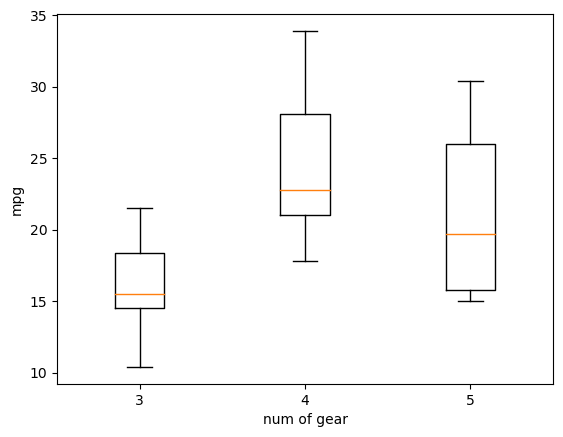

In [36]:
grouped = data.groupby(['gear'])['mpg'] #WoW data.groupby(['__X__']])[' __Y__ ']

fig, ax = plt.subplots()

ax.boxplot([grouped.get_group(3), grouped.get_group(4), grouped.get_group(5)])
ax.set_xticklabels(['3','4','5'])
ax.set_xlabel('num of gear')
ax.set_ylabel('mpg')

Text(0, 0.5, 'wt')

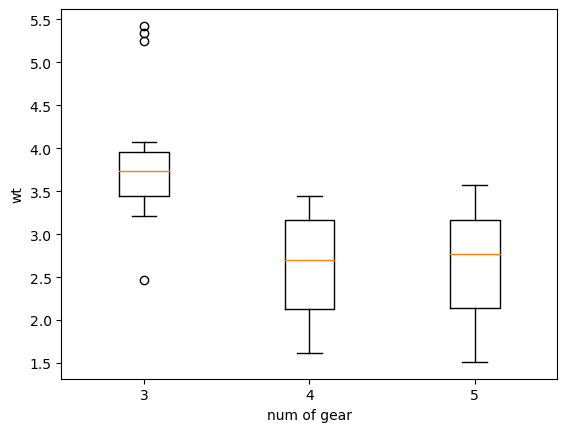

In [38]:
grouped = data.groupby(['gear'])['wt'] #WoW data.groupby(['__X__']])[' __Y__ ']

fig, ax = plt.subplots()

ax.boxplot([grouped.get_group(3), grouped.get_group(4), grouped.get_group(5)])
ax.set_xticklabels(['3','4','5'])
ax.set_xlabel('num of gear')
ax.set_ylabel('wt')

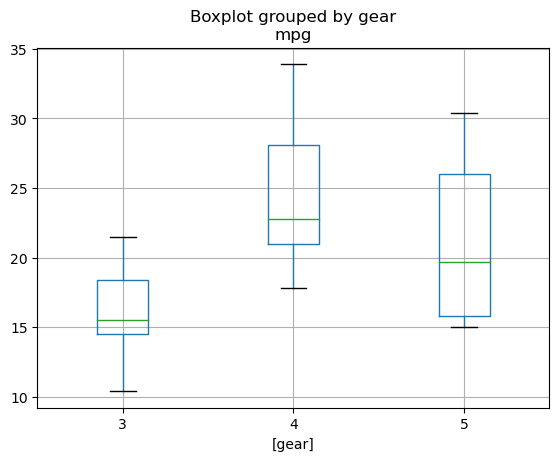

In [39]:
data.boxplot(column=['mpg'],by=['gear'])

---
### 3. 산점도
- 다변량 자료 = 변수가 2개 이상인 자료
- 2개의 변수로 구성된 자료의 분포를 알아보는 그래프
- 관측값들의 분포를 통해 2개의 변수 사이의 관계를 파악하는 기법

In [40]:
# https://gist.github.com/ZeccaLehn/4e06d2575eb9589dbe8c365d61cb056c#file-mtcars-csv
data = pd.read_csv('https://gist.githubusercontent.com/ZeccaLehn/4e06d2575eb9589dbe8c365d61cb056c/raw/64f1660f38ef523b2a1a13be77b002b98665cdfe/mtcars.csv')
data.rename(columns={'Unnamed: 0':'brand'}, inplace=True)
data.head

<bound method NDFrame.head of                   brand   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  \
0             Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1   
1         Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1   
2            Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1   
3        Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0   
4     Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0   
5               Valiant  18.1    6  225.0  105  2.76  3.460  20.22   1   0   
6            Duster 360  14.3    8  360.0  245  3.21  3.570  15.84   0   0   
7             Merc 240D  24.4    4  146.7   62  3.69  3.190  20.00   1   0   
8              Merc 230  22.8    4  140.8   95  3.92  3.150  22.90   1   0   
9              Merc 280  19.2    6  167.6  123  3.92  3.440  18.30   1   0   
10            Merc 280C  17.8    6  167.6  123  3.92  3.440  18.90   1   0   
11           Merc 450SE  16.4    8

Text(0, 0.5, 'mpg')

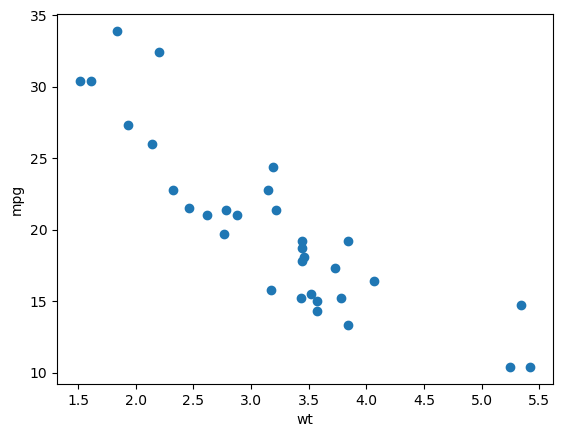

In [41]:
plt.plot(data['wt'],data['mpg'],'o')
plt.xlabel('wt')
plt.ylabel('mpg')

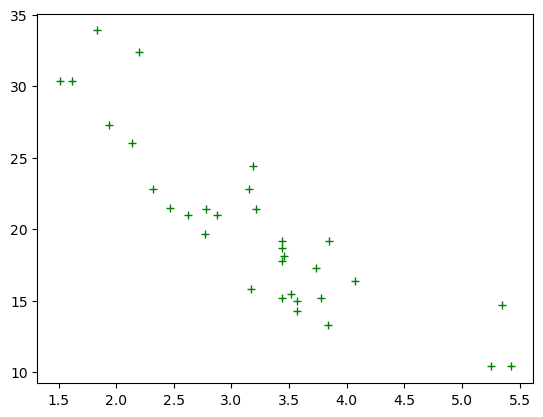

In [50]:
plt.plot(data['wt'],data['mpg'],'o', 
         color='green',
         marker='+') # +, v, ^, <, >, s, d

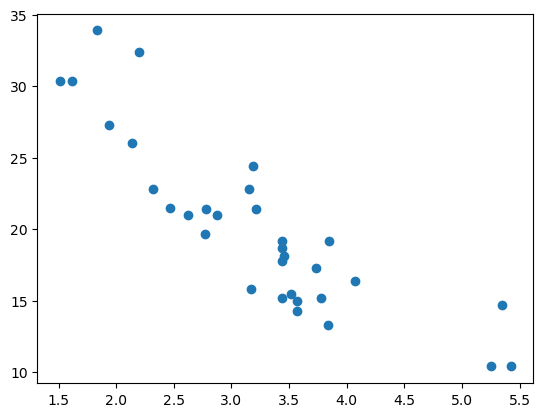

In [43]:
plt.scatter(data['wt'],data['mpg'])

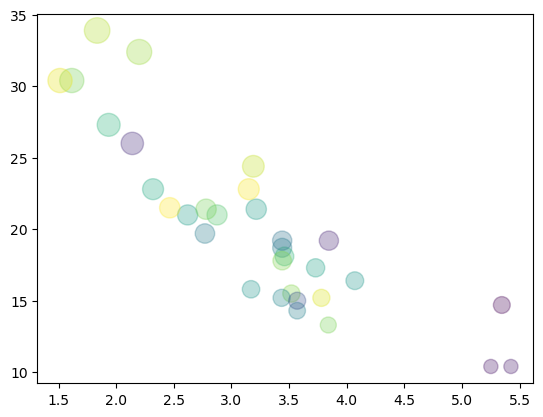

In [55]:
rng = np.random.RandomState(0)
colors = rng.rand(data.shape[0])
plt.scatter(data['wt'],data['mpg'], 
            c=colors, 
            s=10*data['mpg'],
            alpha=0.3)

* 데이터 수가 많아질 경우 plt.plot이 plt.scatter보다 효율적. plt.scatter는 각 점에 대한 속성을 렌더링하는 작업이 추가로 필요하기 때문

#### 그룹 정보가 있는 두 변수의 산점도

In [56]:
#import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

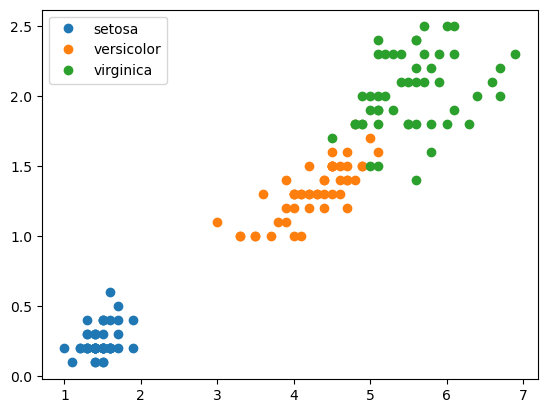

In [317]:
grouped = iris.groupby(['species'])
fig, ax = plt.subplots()
for name, group in grouped:
    plt.plot(group['petal_length'],group['petal_width'],'o',label=name)

plt.legend()

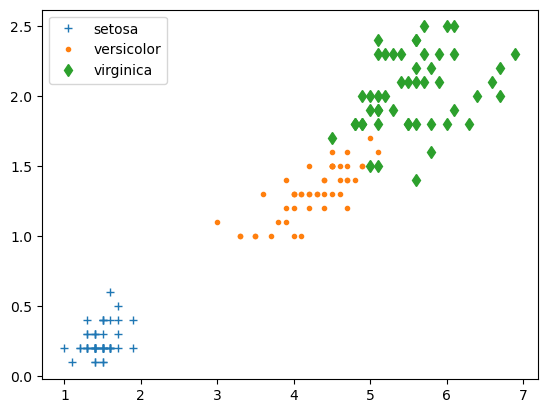

In [318]:
grouped = iris.groupby(['species'])
fig, ax = plt.subplots()
markers = pd.Series(['+','.','d'], index=np.unique(iris.species))

for name, group in grouped:
    plt.plot(group['petal_length'],group['petal_width'],'o',
             label=name, 
             marker=markers[name])

plt.legend()

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

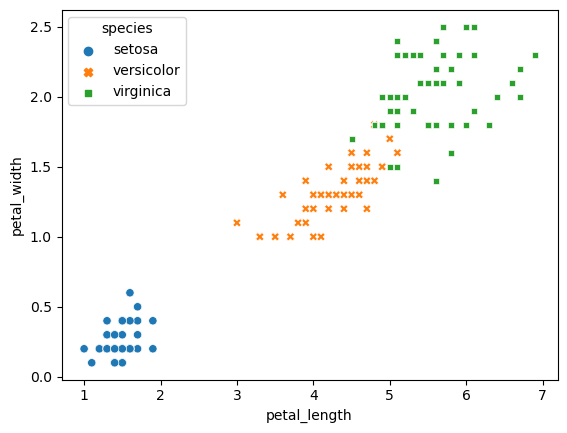

In [319]:
# seaborn 플롯
sns.scatterplot(x='petal_length', y='petal_width', data=iris,
                hue='species', style='species')

#### 여러 변수들 간의 산점도
- seaborn 플롯

In [321]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

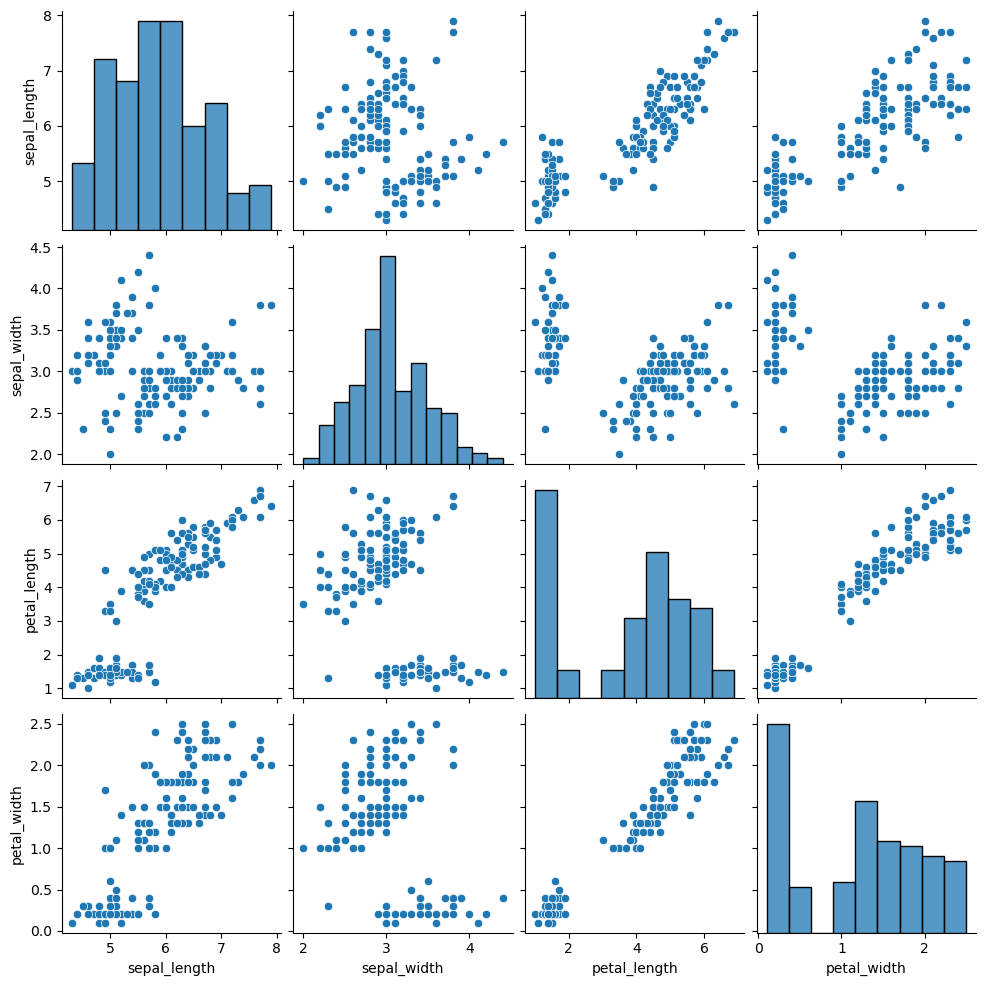

In [322]:
sns.pairplot(iris)

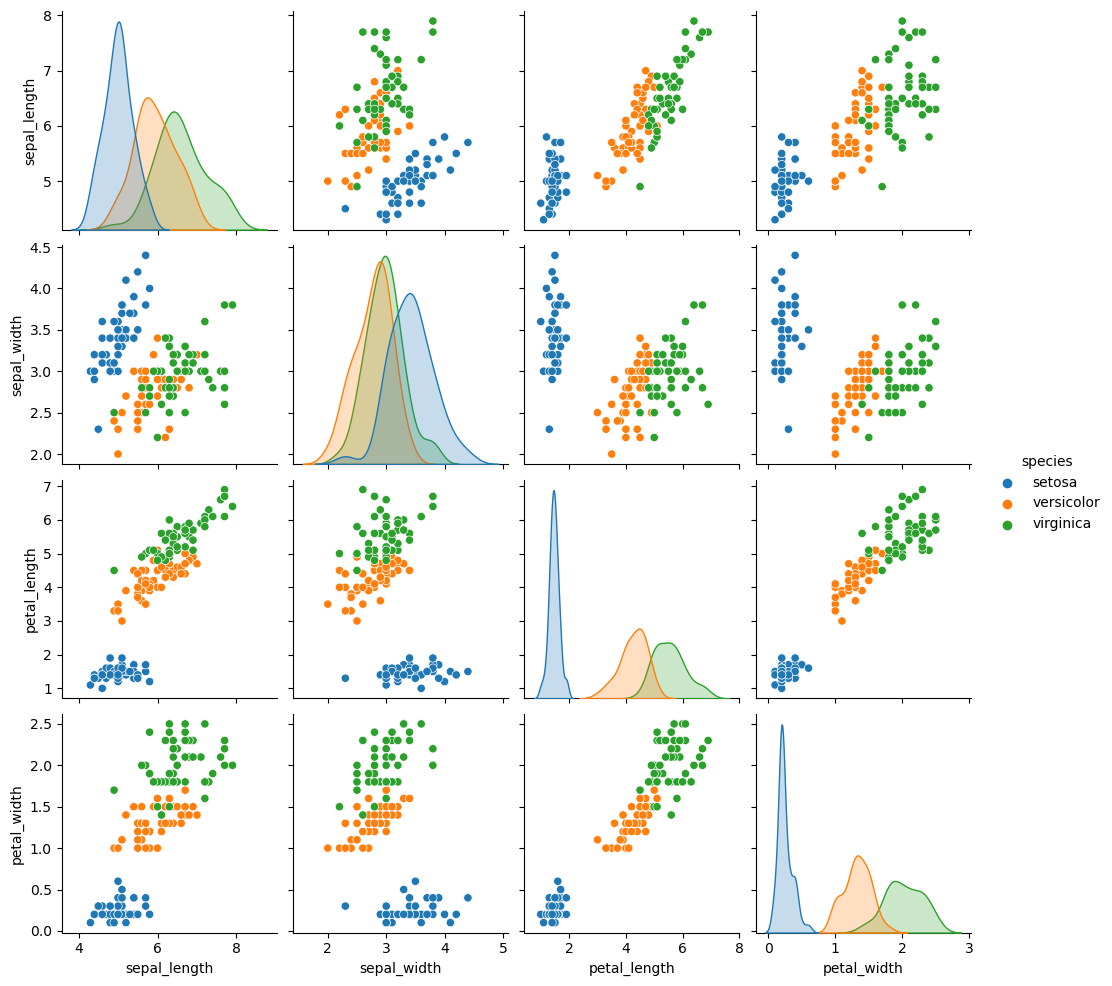

In [323]:
sns.pairplot(iris, hue='species')
#hue 

---
### 4. 상관 분석 Correlation analysis
- 얼마나 선형성을 보이는지 수치상으로 나타냄
- 상관계수(Pearson's correlation coefficeint) = r
$$ r=\frac{\sum_{i=1}^{n}(x_i-\hat{x})(y_i-\hat{y})}{\sqrt{\sum_{i=1}^{n}(x_i-\hat{x})^2\sum_{i=1}^{n}(y_i-\hat{y})^2}} $$
  - $-1<=r<=1$
  - $r > 0$ : 양의 상관관계
  - $r < 0$ : 음의 상관관계
  - $|r|$이 1에 가까울 수록 x,y의 상관성은 높다

![correlation](https://anthonysmoak.files.wordpress.com/2018/05/1.jpg)

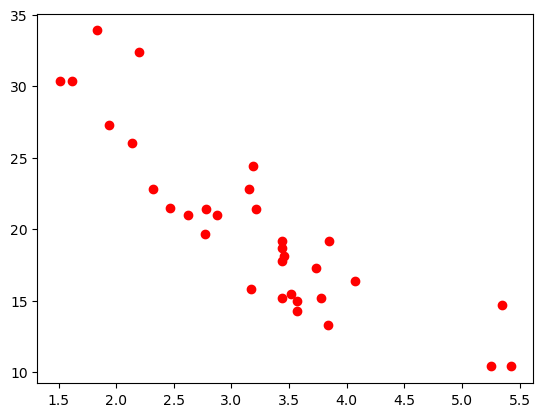

In [324]:
# https://gist.github.com/ZeccaLehn/4e06d2575eb9589dbe8c365d61cb056c#file-mtcars-csv
data = pd.read_csv('https://gist.githubusercontent.com/ZeccaLehn/4e06d2575eb9589dbe8c365d61cb056c/raw/64f1660f38ef523b2a1a13be77b002b98665cdfe/mtcars.csv')
data.rename(columns={'Unnamed: 0':'brand'}, inplace=True)

plt.plot(data.wt, data.mpg, 'o', color='red')

In [326]:
np.corrcoef(data.wt,data.mpg)[0,1] #상관관계는 Numpy에서 corrcoef() 로 

-0.8676593765172279

In [59]:
np.corrcoef(data.wt,data.mpg)

array([[ 1.        , -0.86765938],
       [-0.86765938,  1.        ]])

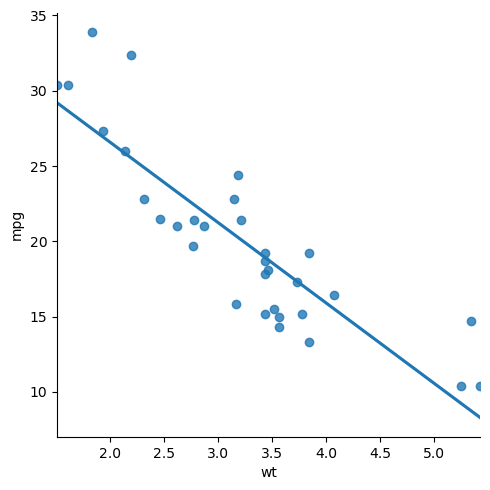

In [61]:
sns.lmplot(x='wt',y='mpg',data=data, ci=None) #line_kws = {'color' : 'red'}
#Seaborn LMPLOT으로 회귀 선을 구함
#?sns.lmplot 상관관계선
#ci=None 은 신뢰구간을 표시 하지 않는다는 의미

In [62]:
data.corr()

mpg       cyl      disp        hp      drat        wt      qsec  \
mpg   1.000000 -0.852162 -0.847551 -0.776168  0.681172 -0.867659  0.418684   
cyl  -0.852162  1.000000  0.902033  0.832447 -0.699938  0.782496 -0.591242   
disp -0.847551  0.902033  1.000000  0.790949 -0.710214  0.887980 -0.433698   
hp   -0.776168  0.832447  0.790949  1.000000 -0.448759  0.658748 -0.708223   
drat  0.681172 -0.699938 -0.710214 -0.448759  1.000000 -0.712441  0.091205   
wt   -0.867659  0.782496  0.887980  0.658748 -0.712441  1.000000 -0.174716   
qsec  0.418684 -0.591242 -0.433698 -0.708223  0.091205 -0.174716  1.000000   
vs    0.664039 -0.810812 -0.710416 -0.723097  0.440278 -0.554916  0.744535   
am    0.599832 -0.522607 -0.591227 -0.243204  0.712711 -0.692495 -0.229861   
gear  0.480285 -0.492687 -0.555569 -0.125704  0.699610 -0.583287 -0.212682   
carb -0.550925  0.526988  0.394977  0.749812 -0.090790  0.427606 -0.656249   

            vs        am      gear      carb  
mpg   0.664039  0.599832  0.480285 -0.550925  
cyl  -0.810812 -0.522607 -0.492687  0.526988  
disp -0.710416 -0.591227 -0.555569  0.394977  
hp   -0.723097 -0.243204 -0.125704  0.749812  
drat  0.440278  0.712711  0.699610 -0.090790  
wt   -0.554916 -0.692495 -0.583287  0.427606  
qsec  0.744535 -0.229861 -0.212682 -0.656249  
vs    1.000000  0.168345  0.206023 -0.569607  
am    0.168345  1.000000  0.794059  0.057534  
gear  0.206023  0.794059  1.000000  0.274073  
carb -0.569607  0.057534  0.274073  1.000000

In [63]:
data.corr().style.background_gradient()

In [64]:
coef = data.corr()
coef = np.where(coef==1,0,coef) #np.where( ? , true, false) 조건이 참이면 coef==1 값은 0으로 대체됨
coef.max()
np.where(coef==coef.max())
#np.where(coef==coef.min())

(array([1, 2], dtype=int64), array([2, 1], dtype=int64))

---
### 5. 선그래프

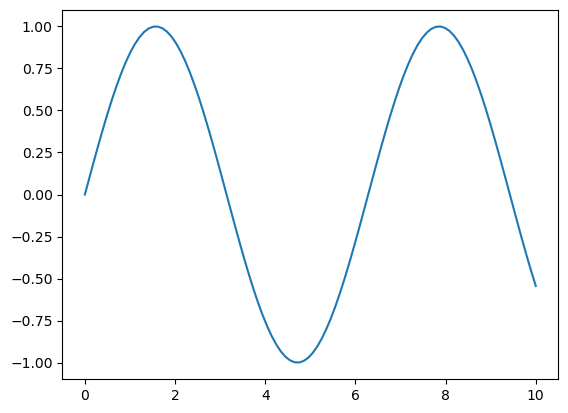

In [65]:
x = np.linspace(0,10,100)
plt.plot(x, np.sin(x))

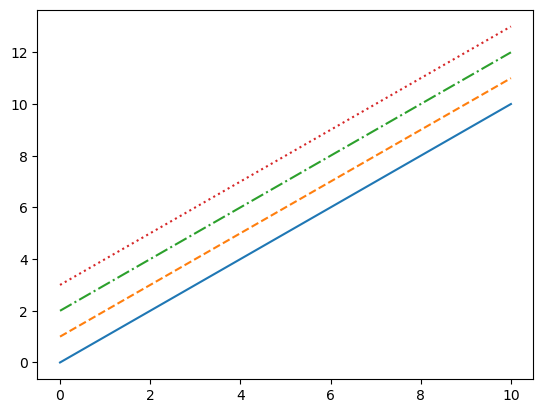

In [66]:
plt.plot(x, x+0, linestyle='solid') #solid ㅡ
plt.plot(x, x+1, linestyle='dashed') #dashed ---
plt.plot(x, x+2, linestyle='dashdot') #dashdot -.-.-
plt.plot(x, x+3, linestyle='dotted') #dotted .....

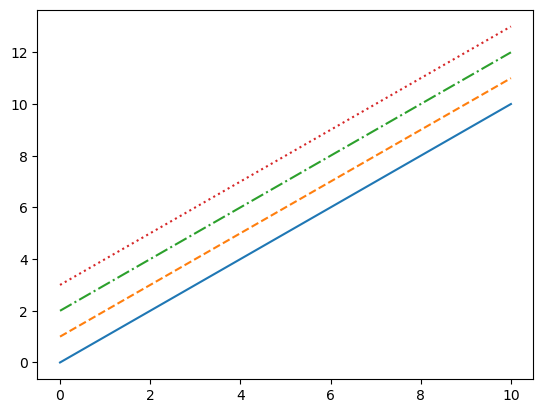

In [67]:
plt.plot(x, x+0, linestyle='-') #solid
plt.plot(x, x+1, linestyle='--') #dashed
plt.plot(x, x+2, linestyle='-.') #dashdot
plt.plot(x, x+3, linestyle=':') #dotted

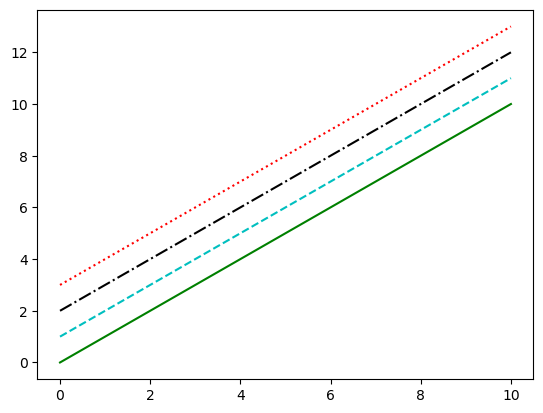

In [68]:
plt.plot(x, x+0, '-g') #solid green
plt.plot(x, x+1, '--c') #dashed cyan
plt.plot(x, x+2, '-.k') #dashdot black
plt.plot(x, x+3, ':r') #dotted red